             datetime  sunny_time
0 2022-10-01 01:00:00         0.0
1 2022-10-01 02:00:00         0.0
2 2022-10-01 03:00:00         0.0
3 2022-10-01 04:00:00         0.0
4 2022-10-01 05:00:00         0.0
5 2022-10-01 06:00:00         0.0
6 2022-10-01 07:00:00         1.0
7 2022-10-01 08:00:00         1.0
8 2022-10-01 09:00:00         1.0
9 2022-10-01 10:00:00         1.0
datetime      datetime64[ns]
sunny_time           float64
dtype: object


<AxesSubplot:xlabel='datetime'>

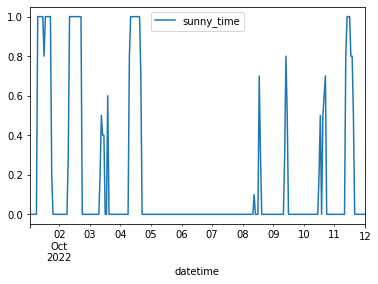

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sunny_time = pd.read_csv('sunny_time_10_1_to_11.csv',  sep=',', usecols=[0, 1], names=('datetime', 'sunny_time'))
sunny_time = sunny_time.fillna(0)
sunny_time['datetime'] = pd.to_datetime(sunny_time['datetime'])
print(sunny_time[0:10])
print(sunny_time.dtypes)
sunny_time.plot(x="datetime",y="sunny_time")

       voltage                datetime
1140    13.120 2022-10-05 13:03:16.943
1141    13.116 2022-10-05 13:04:18.452
1142    13.116 2022-10-05 13:05:19.147
1143    13.120 2022-10-05 13:06:19.772
1144    13.120 2022-10-05 13:07:20.502
...        ...                     ...
10941   13.072 2022-10-12 13:41:16.869
10942   13.076 2022-10-12 13:42:47.827
10943   13.072 2022-10-12 13:43:52.489
10944   13.072 2022-10-12 13:44:53.226
10945   13.072 2022-10-12 13:45:54.811

[9806 rows x 2 columns]
voltage            float64
datetime    datetime64[ns]
dtype: object


<AxesSubplot:xlabel='datetime'>

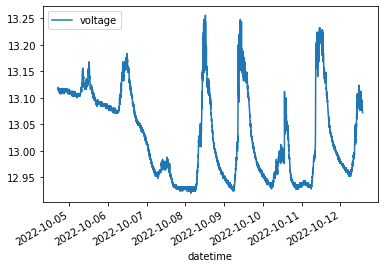

In [241]:
voltage = pd.read_csv('ambient_10_4_to_12.csv',  sep=',', usecols=[0, 1, 2], names=('date', 'time', 'voltage'), skiprows=1)
voltage['datetime'] = voltage['date'] + voltage['time']
voltage = voltage.drop(columns=['date', 'time'])
voltage['datetime'] = pd.to_datetime(voltage['datetime'], format='%m/%d/%Y %I:%M:%S %p.%f')
print(voltage[1140:])
print(voltage.dtypes)
voltage.plot(x="datetime",y="voltage")

In [242]:
merged_data = pd.merge(sunny_time, voltage, on='datetime', how='outer')
merged_data = merged_data.set_index('datetime').sort_index()
merged_data = merged_data.fillna({'sunny_time': 0})
print(merged_data[490:])

                         sunny_time  voltage
datetime                                    
2022-10-04 23:59:59.212         0.0   13.112
2022-10-05 00:00:00.000         0.0      NaN
2022-10-05 00:00:59.703         0.0   13.116
2022-10-05 00:02:00.427         0.0   13.112
2022-10-05 00:03:01.935         0.0   13.112
...                             ...      ...
2022-10-12 13:41:16.869         0.0   13.072
2022-10-12 13:42:47.827         0.0   13.076
2022-10-12 13:43:52.489         0.0   13.072
2022-10-12 13:44:53.226         0.0   13.072
2022-10-12 13:45:54.811         0.0   13.072

[10720 rows x 2 columns]


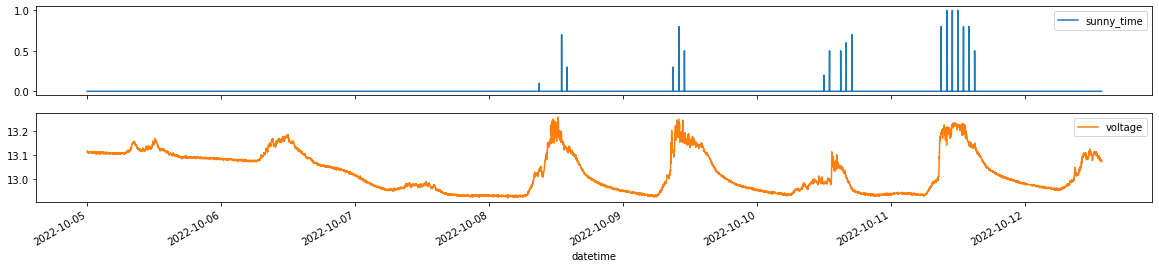

In [243]:
merged_data["2022-10-05":"2022-10-12"].plot(subplots=True, figsize=(20,4))
plt.savefig("output.png")

In [244]:
for i in range(4,13):
    print(merged_data["2022-10-"+str(i)+" 00:00:01.000":"2022-10-"+str(i)+" 00:01:00.000"])

Empty DataFrame
Columns: [sunny_time, voltage]
Index: []
                         sunny_time  voltage
datetime                                    
2022-10-05 00:00:59.703         0.0   13.116
                         sunny_time  voltage
datetime                                    
2022-10-06 00:00:09.369         0.0   13.084
                         sunny_time  voltage
datetime                                    
2022-10-07 00:00:25.605         0.0   13.016
                         sunny_time  voltage
datetime                                    
2022-10-08 00:00:59.143         0.0   12.928
                         sunny_time  voltage
datetime                                    
2022-10-09 00:00:35.624         0.0   12.952
                         sunny_time  voltage
datetime                                    
2022-10-10 00:00:50.746         0.0   12.952
                         sunny_time  voltage
datetime                                    
2022-10-11 00:00:35.636         0.0   12.93